# $\Delta t = 0.1$

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("CS_paper")

from matplotlib import animation
from IPython.display import HTML

In [2]:
weight_temp = np.loadtxt("weight_3_3.dat")
laplacian_temp = np.loadtxt("lap_3_3.dat")
diffusion_temp = np.loadtxt("diffusion_3_3.dat")
x_pts_temp = np.loadtxt("x_pts_3_3.dat")

h = 0.1
D = 1.
rho = 20.

t_0 = 2. * h**2 /(4.*D)

In [3]:
t_list_weight = np.unique(weight_temp[:,0])
nt_weight = len(t_list_weight)
nx_weight = int(len(weight_temp[:,0])/nt_weight)
weight = weight_temp[:,1].reshape(nt_weight, nx_weight)

t_list_lap = np.unique(laplacian_temp[:,0])
nt_lap = len(t_list_lap)
nx_lap = int(len(laplacian_temp[:,0])/nt_lap)
laplacian = laplacian_temp[:,1].reshape(nt_lap, nx_lap)

t_list_diff = np.unique(diffusion_temp[:,0])
nt_diff = len(t_list_diff)
nx_diff = int(len(diffusion_temp[:,0])/nt_diff)
diffusion = diffusion_temp[:,1].reshape(nt_diff, nx_diff)

t_list_x_pts = np.unique(x_pts_temp[:,0])
nt_x_pts = len(t_list_x_pts)
nx_x_pts = int(len(x_pts_temp[:,0])/nt_x_pts)
x_pts_part = x_pts_temp[:,1].reshape(nt_x_pts, nx_x_pts)

In [4]:
x_pts = np.linspace(-2., 2., nx_weight)
A = 10./(np.sqrt(2.*np.pi) * h * rho)

weight_exact = np.zeros((nt_weight, nx_weight))
for idt, t in enumerate(t_list_weight):
    for idx, x in enumerate(x_pts):
        weight_exact[idt, idx] = A * np.sqrt(t_0/(t+t_0)) \
                        * np.exp(-x**2/(4. * D * (t_0+t)))

<IPython.core.display.Javascript object>


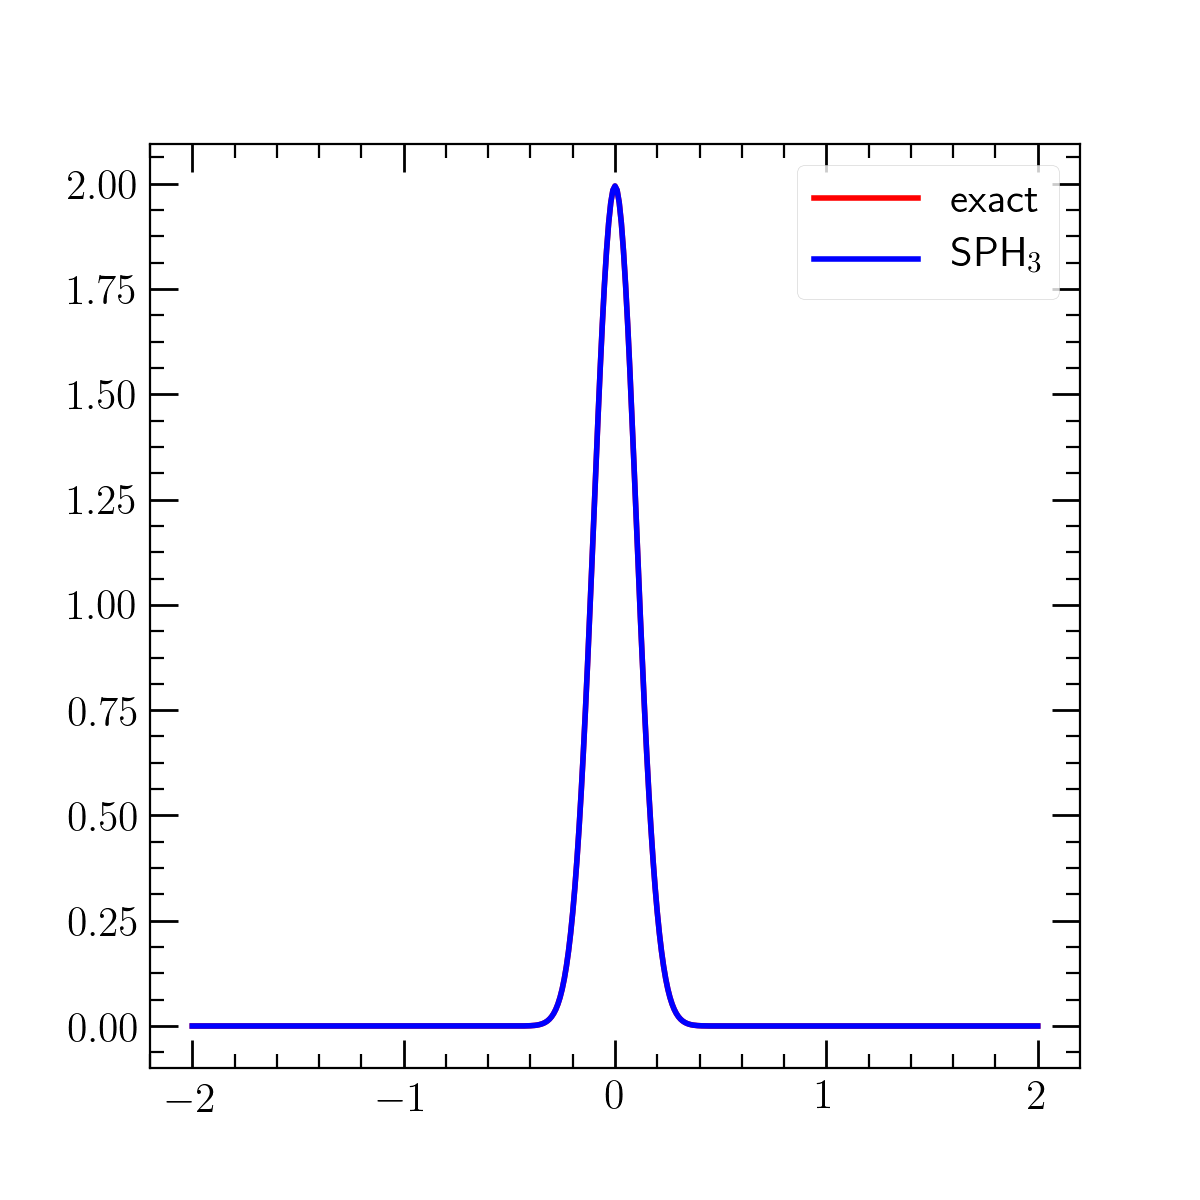

In [5]:
fig1 = plt.figure(figsize=(6, 6))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x_pts, weight_exact[0,:], color='red', label="exact")
ax1.plot(x_pts, weight[0,:], color='blue', label="SPH$_3$")
ax1.set_ylim(-0.1,2.1)
ax1.legend()

fig1.savefig('weight_init_3_3.png', bbox_inches='tight', dpi = 200.)

<IPython.core.display.Javascript object>


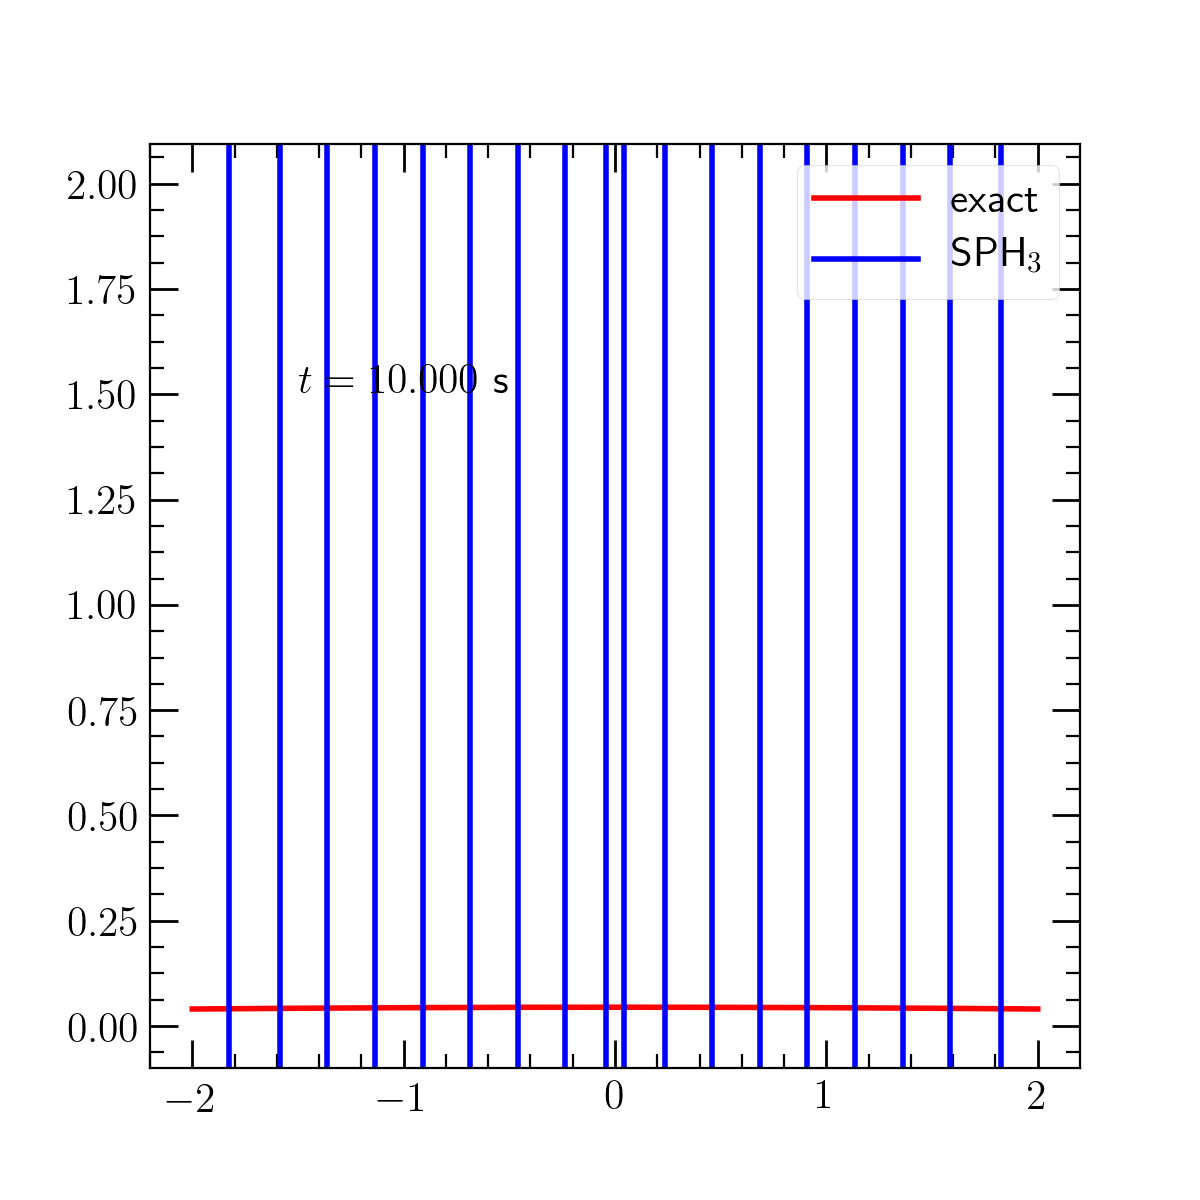

In [6]:
fig_anim = plt.figure(figsize=(6, 6))
ax_anim = fig_anim.add_subplot(1,1,1)
plot1, = ax_anim.plot(x_pts, weight_exact[0,:], color='red', label="exact")
plot2, = ax_anim.plot(x_pts, weight[0,:], color='blue', label="SPH$_3$")
time_text = ax_anim.text(-1.5, 1.5, r"$t = {0:4.3f}$ s".format(t_list_weight[0]),
                      color="black", fontsize=15)
ax_anim.set_ylim(-0.1,2.1)
ax_anim.legend()

def animate(i):
    global plot1, plot2
    plot1.set_data(x_pts, weight_exact[i,:])
    plot2.set_data(x_pts, weight[i,:])
    
    time_text.set_text(r"$t = {0:4.3f}$ s".format(t_list_weight[i]))
    
    return (plot1,), (plot2,), time_text

anim = animation.FuncAnimation(fig_anim, animate, frames=nt_weight, repeat=False)
anim.save('diffusion_anim_3_3.mp4', fps=1)